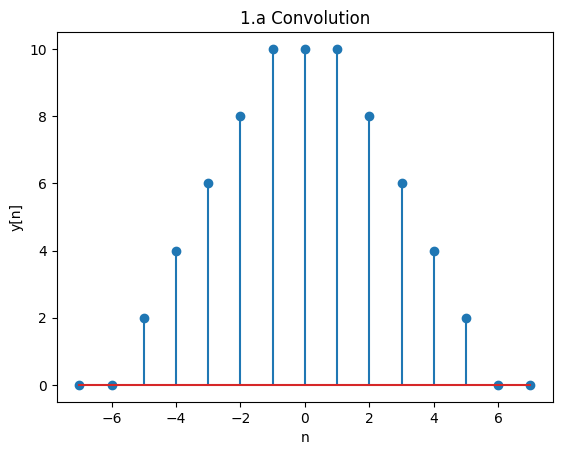

In [17]:
import numpy as np
import matplotlib.pyplot as plt

y = [0,0,2,4,6,8,10,10,10,8,6,4,2,0,0]
x = np.arange(-7, 8)
plt.stem(x, y)
plt.xlabel("n")
plt.ylabel("y[n]")
plt.title("1.a Convolution")

plt.savefig("1a-conv.png", dpi=300, bbox_inches="tight")
plt.show()

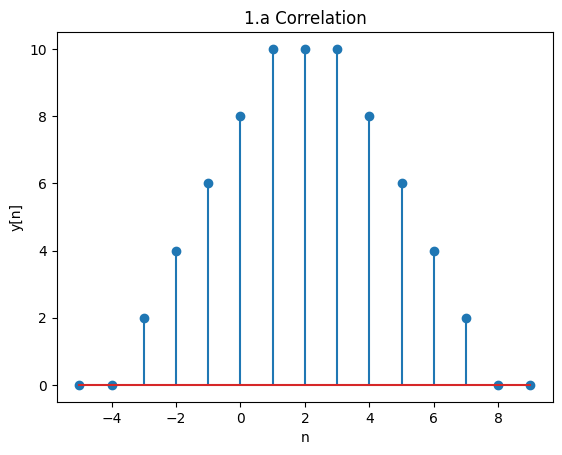

In [18]:
import numpy as np
import matplotlib.pyplot as plt

y = [0,0,2,4,6,8,10,10,10,8,6,4,2,0,0]
x = np.arange(-5, 10)
plt.stem(x, y)
plt.xlabel("n")
plt.ylabel("y[n]")
plt.title("1.a Correlation")

plt.savefig("1a-corr.png", dpi=300, bbox_inches="tight")
plt.show()

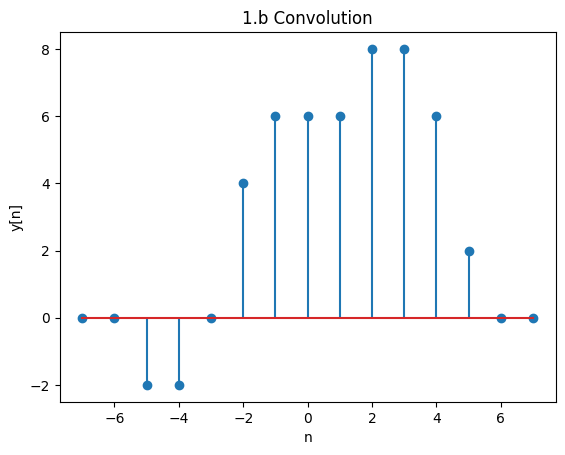

In [19]:
y = [0,0,-2,-2,0,4,6,6,6,8,8,6,2,0,0]
x = np.arange(-7, 8)
plt.stem(x, y)
plt.xlabel("n")
plt.ylabel("y[n]")
plt.title("1.b Convolution")

plt.savefig("1b-conv.png", dpi=300, bbox_inches="tight")
plt.show()

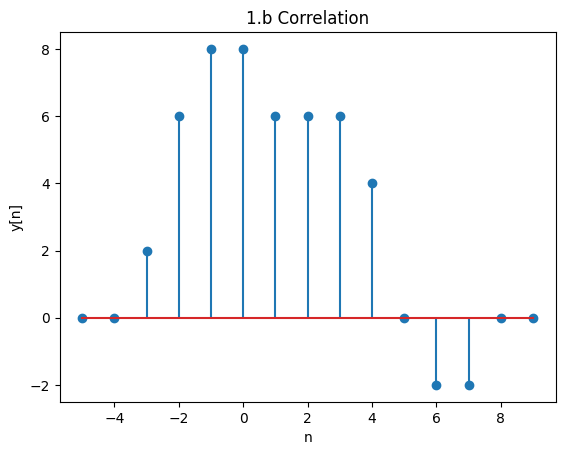

In [20]:
y = [0,0,2,6,8,8,6,6,6,4,0,-2,-2,0,0]
x = np.arange(-5, 10)
plt.stem(x, y)
plt.xlabel("n")
plt.ylabel("y[n]")
plt.title("1.b Correlation")

plt.savefig("1b-corr.png", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
def discrete_convolution(x, h):
    """Compute the discrete convolution of two sequences x and h."""
    len_x = len(x)
    len_h = len(h)
    len_y = len_x + len_h - 1
    y = np.zeros(len_y)
    
    for n in range(len_y):
        for k in range(len_h):
            if 0 <= n - k < len_x:
                y[n] += x[n - k] * h[k]
    
    return y

n=-5 : y[n]=2
n=-4 : y[n]=4
n=-3 : y[n]=6
n=-2 : y[n]=8
n=-1 : y[n]=10
n= 0 : y[n]=10
n= 1 : y[n]=10
n= 2 : y[n]=8
n= 3 : y[n]=6
n= 4 : y[n]=4
n= 5 : y[n]=2


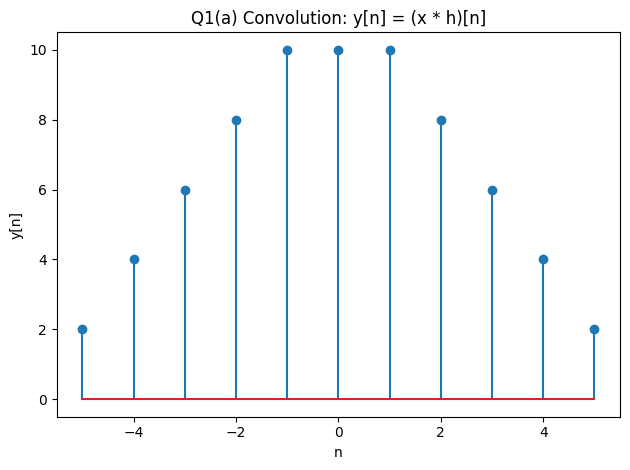

In [11]:
# --- Define signals for Q1(a) ---
# x[n] = 2 for -2 <= n <= 4, else 0
nx = np.arange(-2, 5)         # support of x
x  = np.full_like(nx, 2, dtype=float)

# h[n] = 1 for -3 <= n <= 1, else 0
nh = np.arange(-3, 2)         # support of h
h  = np.ones_like(nh, dtype=float)

# --- Convolution support: n runs from (nx0+nh0) to (nx1+nh1) ---
ny = np.arange(nx[0] + nh[0], nx[-1] + nh[-1] + 1)

# --- Manual convolution: y[n] = sum_k x[n-k] h[k] ---
y_manual = np.zeros_like(ny, dtype=float)
for i, n in enumerate(ny):
    s = 0.0
    for k in nh:
        nmk = n - k
        # accumulate only when n-k is in support of x
        if nmk >= nx[0] and nmk <= nx[-1]:
            # x[n-k] = 2 (within support), h[k] = 1 (within support)
            s += 2.0 * 1.0
    y_manual[i] = s

# --- NumPy convolution for cross-check (aligning supports) ---
# When arrays are ordered by increasing indices, conv result index 0 corresponds to ny[0]
y_np = np.convolve(x, h)

# Verify both methods match
assert np.allclose(y_manual, y_np), "Manual conv and np.convolve disagree!"

# --- Print (n, y[n]) pairs ---
for n, val in zip(ny, y_manual):
    print(f"n={n:>2d} : y[n]={val:g}")

# --- Plot & save figure (save before show) ---
fig, ax = plt.subplots()
markerline, stemlines, baseline = ax.stem(ny, y_manual)
ax.set_xlabel("n")
ax.set_ylabel("y[n]")
ax.set_title("Q1(a) Convolution: y[n] = (x * h)[n]")
fig.tight_layout()
fig.savefig("1a-conv.png", dpi=300, bbox_inches="tight")
plt.show()
